In [5]:
#use for load data file
import kagglehub

In [8]:

import pandas as pd
import matplotlib.pyplot as plt
from reportlab.platypus import SimpleDocTemplate, Paragraph, Spacer, Image
from reportlab.lib.styles import getSampleStyleSheet
from reportlab.lib.pagesizes import A4


'''
ReportLab is a Python library used to create PDFs programmatically.
We’re using it to generate a one-page business report (PDF) 
with:
Text (KPIs, insights)
Headings
Charts (images)
Clean layout (like a real company report)
'''


In [14]:
df= pd.read_csv("Sample _Superstore.csv")

In [24]:
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   object        
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

In [15]:
# Convert date
df["Order Date"] = pd.to_datetime(df["Order Date"])


In [16]:
#kpi callulation
total_revenue = df["Sales"].sum()
average_order_value = df.groupby("Order ID")["Sales"].sum().mean()
top_region = df.groupby("Region")["Sales"].sum().idxmax()

print("Total Revenue:", total_revenue)
print("Average Order Value:", average_order_value)
print("Top Region:", top_region)


Total Revenue: 2297200.8603000003
Average Order Value: 458.61466566180883
Top Region: West


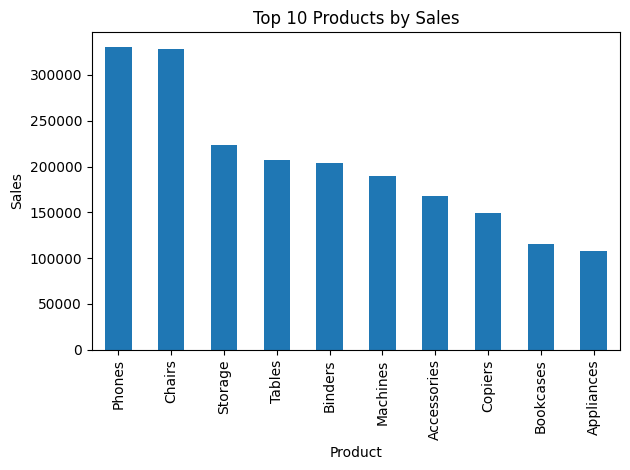

In [19]:
top_products = (
    df.groupby("Sub-Category")["Sales"]
    .sum()
    .sort_values(ascending=False)
)

plt.figure()
top_products.head(10).plot(kind="bar")
plt.title("Top 10 Products by Sales")
plt.xlabel("Product")
plt.ylabel("Sales")
plt.tight_layout()
plt.savefig("top_products.png")
#plt.close()


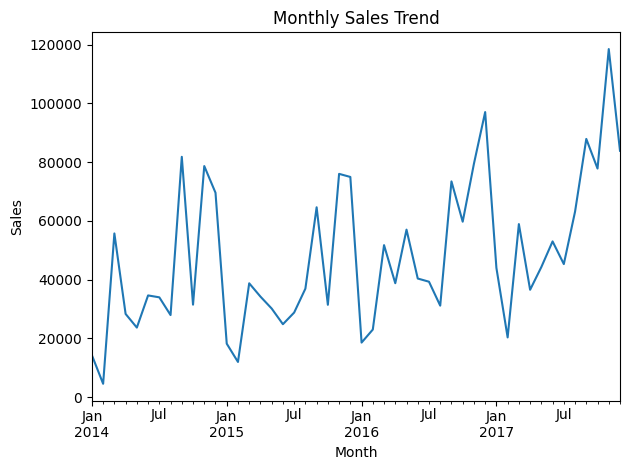

In [20]:
monthly_sales = (
    df.set_index("Order Date")
    .resample("ME")["Sales"]
    .sum()
)

plt.figure()
monthly_sales.plot()
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Sales")
plt.tight_layout()
plt.savefig("monthly_trend.png")
#plt.close()


In [21]:
pdf = SimpleDocTemplate("Sales_Analysis_Summary.pdf", pagesize=A4)
styles = getSampleStyleSheet()
elements = []

elements.append(Paragraph("Sales Analysis Summary", styles["Title"]))
elements.append(Spacer(1, 12))

elements.append(Paragraph(f"Total Revenue: ${total_revenue:,.2f}", styles["Normal"]))
elements.append(Paragraph(f"Average Order Value: ${average_order_value:,.2f}", styles["Normal"]))
elements.append(Paragraph(f"Top Region: {top_region}", styles["Normal"]))
elements.append(Spacer(1, 12))

elements.append(Paragraph("Key Insights", styles["Heading2"]))
elements.append(Paragraph("• Technology and Office Supplies drive the highest revenue.", styles["Normal"]))
elements.append(Paragraph("• Sales peak during end-of-year months (holiday season).", styles["Normal"]))
elements.append(Paragraph("• Focus inventory and marketing on the top-performing region.", styles["Normal"]))
elements.append(Spacer(1, 12))

elements.append(Image("monthly_trend.png", width=400, height=200))
elements.append(Spacer(1, 12))
elements.append(Image("top_products.png", width=400, height=200))

pdf.build(elements)
